# **2 - Auto-assosiative Network**

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# modify?
def do_hebbian_rule(s, t):
  w = np.dot(s.T, t)
  return w - np.identity(len(s.T))

In [3]:
def train_model(R, N):
  S = np.array([random.choices([-1, 1], k=N) for i in range(R)])
  W = do_hebbian_rule(S, S)
  return S, W

In [4]:
def add_noise(noise_rate, inputs, alternative):
  noisy_inputs = inputs.copy()
  for input in noisy_inputs:
    noise_count = int(noise_rate * len(input))
    noises_index = random.sample(range(len(input)), noise_count)
    for noise_index in noises_index:
      input[noise_index] = alternative * input[noise_index]
  return noisy_inputs

In [17]:
def run_model(E, R, N, Runs=30):
  S, W = train_model(R, N)
  accuracy = []
  for i in range(Runs):
    noisy_S = add_noise(E, S, -1)
    prediction = np.dot(noisy_S, W)
    prediction = np.where(prediction > 0, 1, -1)  
    accuracy.append(np.mean(prediction == S))
  return np.mean(accuracy), np.std(accuracy)

In [23]:
def plot_result(R, accuracies, E, Runs=30):
  plt.figure(figsize=(12,10))
  plt.xlabel('Number of Vectors')
  plt.ylabel('Mean Accuracy')
  plt.title('Auto-assosiative Network Accuracy with Random Vectors')
  for e, accuracy in accuracies.items():
      plt.plot(R, accuracy, label = 'Average Accuracy of {} Runs with {}% Noise'.format(Runs, e))
  plt.legend()
  plt.show()


In [8]:
R = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
N = 100
E = [0, 20, 40]

In [26]:
accuracies_mean = {}
for e in E:
  print('E = {}'.format(e))
  accuracies_mean[e] = []
  accuracies_std[e] = []
  for r in R:
    print('R = {}'.format(r))
    mean, std = run_model(e*0.01, r, N)
    print('Mean = {}, Std = {:.20f}'.format(mean, std))
    accuracies_mean[e].append(mean)

E = 0
R = 10
Mean = 1.0, Std = 0.00000000000000000000
R = 20
Mean = 0.9974999999999998, Std = 0.00000000000000022204
R = 30
Mean = 0.994, Std = 0.00000000000000000000
R = 40
Mean = 0.9905000000000003, Std = 0.00000000000000022204
R = 50
Mean = 0.9835999999999998, Std = 0.00000000000000022204
R = 60
Mean = 0.9795000000000004, Std = 0.00000000000000033307
R = 70
Mean = 0.9745714285714288, Std = 0.00000000000000022204
R = 80
Mean = 0.9763750000000002, Std = 0.00000000000000022204
R = 90
Mean = 0.978333333333333, Std = 0.00000000000000033307
R = 100
Mean = 0.9789999999999998, Std = 0.00000000000000022204
E = 20
R = 10
Mean = 0.9835999999999999, Std = 0.00677052435192430913
R = 20
Mean = 0.9372666666666668, Std = 0.00717023167144702125
R = 30
Mean = 0.902811111111111, Std = 0.00563236897290238844
R = 40
Mean = 0.8823333333333333, Std = 0.00538954749698174803
R = 50
Mean = 0.8652599999999999, Std = 0.00492209982290755816
R = 60
Mean = 0.8550388888888889, Std = 0.00383229051838244149
R = 70
M

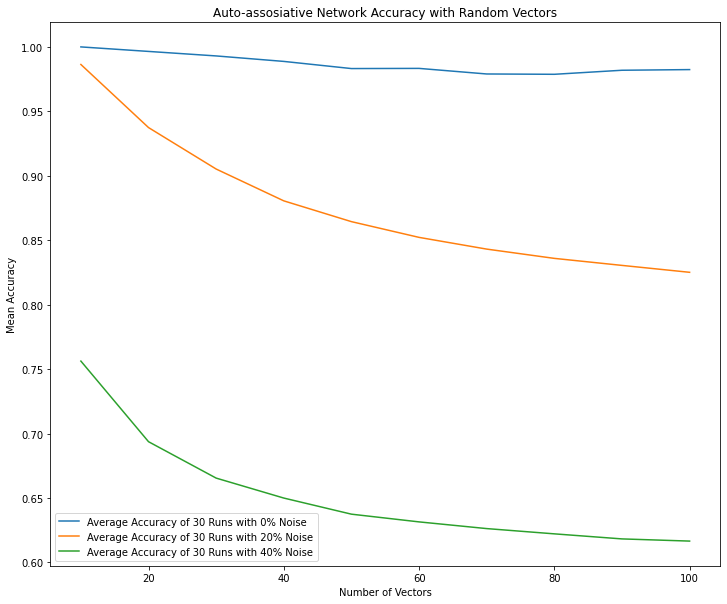

In [24]:
plot_result(R, accuracies_mean, e)